# 第六次作业
### 姓名：张家琪
### 班级：2020211601
### 学号：2020211178

# 作业内容

## （1）参考链接的中文文献，学习浮雕效果的实现原理（线性滤波），用PYTHON实现浮雕效果。

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from PIL import Image
from PIL import Image
from PIL import ImageFilter

(0.0, 1.0)

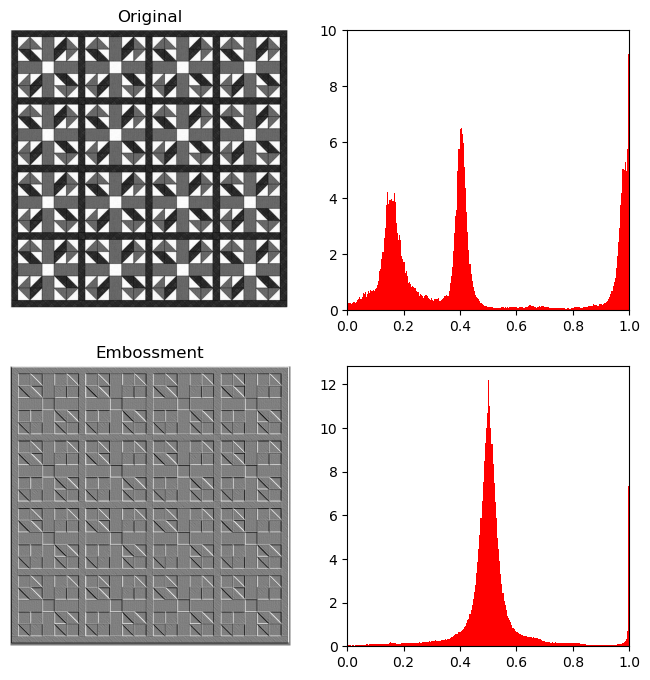

In [2]:
# 通过PIL.ImageFilter库中的已有函数实现

plt.figure("hist",figsize=(8,8))

img_1_1=io.imread("img.jpg",as_gray=True)
plt.subplot(221)
plt.imshow(img_1_1,cmap=plt.cm.gray) # 原始图像
plt.axis('off')
plt.title('Original')
arr=img_1_1.flatten()
plt.subplot(222)
plt.hist(arr, bins=256, density=True, edgecolor='None',facecolor='red') # 原始图像直方图
plt.ylim(0,10)
plt.xlim(0,1)

imagePath = "img.jpg"
img_1_1 = Image.open(imagePath)
img_1_2=img_1_1.filter(ImageFilter.EMBOSS) # 调用pil库中的已有滤波器实现浮雕效果
plt.subplot(223)
plt.imshow(img_1_2,cmap=plt.cm.gray) # 浮雕后图像
plt.axis('off')
plt.title('Embossment')
img_1_2=io.imread("output_1_1.png",as_gray=True)
plt.subplot(224)
arr_2=img_1_2.flatten()
plt.hist(arr_2, bins=256, density=True, edgecolor='None',facecolor='red') # 浮雕图像直方图
plt.xlim(0,1)

(-11.0, 11.0)

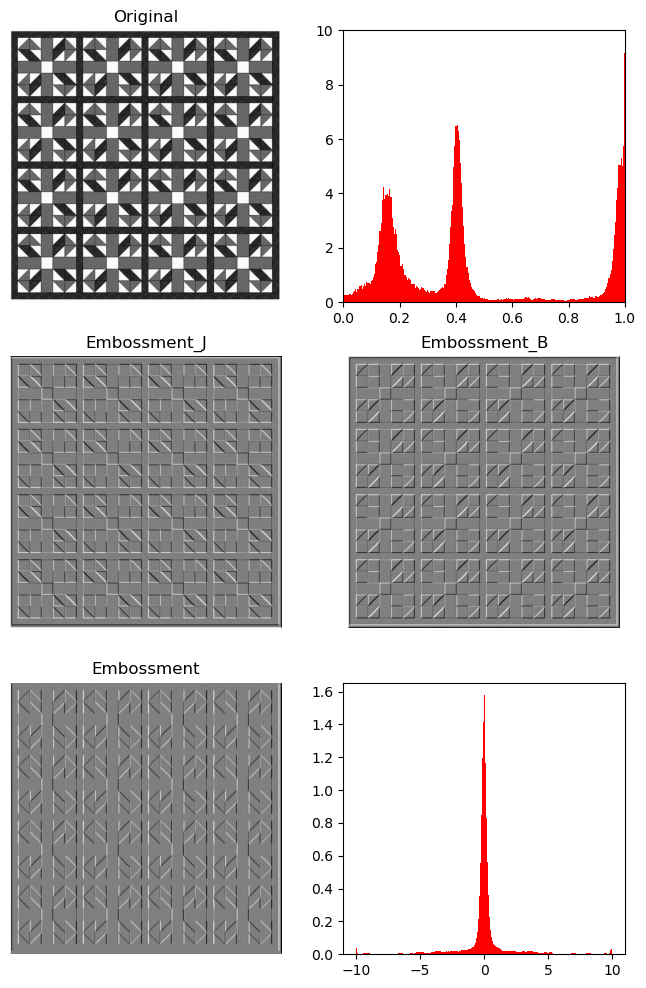

In [3]:
# 通过参考论文方法自主实现

plt.figure("hist",figsize=(8,12))

img_2_1=io.imread("img.jpg",as_gray=True)
arr_2_1=img_2_1.flatten()
plt.subplot(321)
plt.imshow(img_2_1,cmap=plt.cm.gray) # 原始图像
plt.axis('off')
plt.title('Original')
plt.subplot(322)
plt.hist(arr_2_1, bins=256, density=True, edgecolor='None',facecolor='red') # 原始图像直方图
plt.ylim(0,10)
plt.xlim(0,1)

arr_2_1=arr_2_1.reshape(564,564)*255

# 水平方向算子
h=np.array([[0,-1,-4],
            [1,0,-1],
            [4,1,0]])

# 竖直方向算子
v=np.array([[4,1,0],
            [1,0,-1],
            [0,-1,-4]])

# 卷积
arr_J=signal.convolve2d(arr_2_1,h)
arr_B=signal.convolve2d(arr_2_1,v)
arr_2_2=arr_J+arr_B

plt.subplot(323)
plt.imshow(arr_J,cmap=plt.cm.gray) # 水平方向卷积后
plt.axis('off')
plt.title('Embossment_J')
plt.subplot(324)
plt.imshow(arr_B,cmap=plt.cm.gray) # 竖直方向卷积后
plt.axis('off')
plt.title('Embossment_B')
plt.subplot(325)
plt.imshow(arr_2_2,cmap=plt.cm.gray) # 最终效果
plt.axis('off')
plt.title('Embossment')
plt.subplot(326)
arr_2_2=arr_2_2.ravel()/255
plt.hist(arr_2_2, bins=256, density=True, edgecolor='None',facecolor='red') # 浮雕图像直方图
plt.xlim()

## （2）参考链接的英文文献，学习油画效果的实现原理（非线性滤波），用PYTHON实现彩色图像的油画效果

(0.0, 255.0)

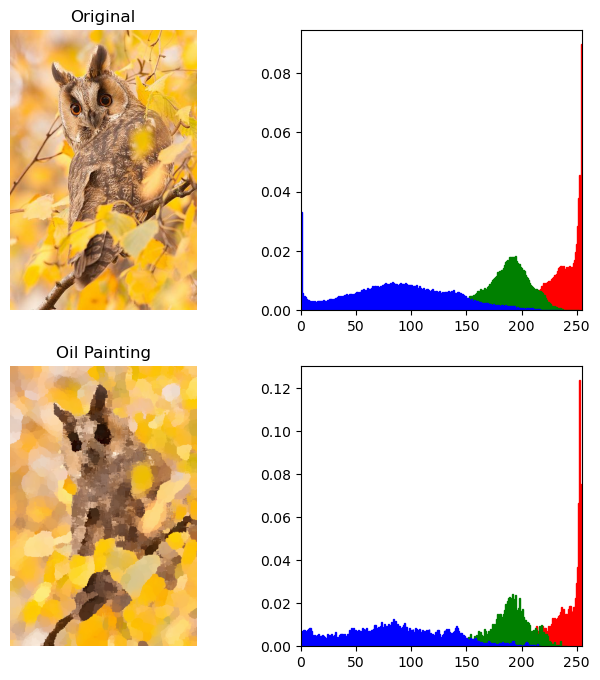

In [4]:
# 通过opencv库已有函数实现

%matplotlib inline
import cv2

plt.figure("hist",figsize=(8,8))

img_3_1=cv2.imread('img_2.jpg')
plt.subplot(221)
plt.imshow(img_3_1[:,:,::-1]) # 改变数组顺序，因为cv2 rgb图像为BGR,pyplot.imshow为RGB，原始图像
plt.title('Original')
plt.axis('off')
plt.subplot(222)
ar_3_1=img_3_1[:,:,2].flatten()
plt.hist(ar_3_1, bins=256, density=True, facecolor='r',edgecolor='r')
ag_3_1=img_3_1[:,:,1].flatten()
plt.hist(ag_3_1, bins=256, density=True, facecolor='g',edgecolor='g')
ab_3_1=img_3_1[:,:,0].flatten()
plt.hist(ab_3_1, bins=256, density=True, facecolor='b',edgecolor='b') # 原始图像RGB直方图
plt.xlim(0,255)

img_3_2=cv2.xphoto.oilPainting(img_3_1, 7, 1) # 使用opencv中已有函数实现油画效果
plt.subplot(223)
plt.imshow(img_3_2[:,:,::-1]) # 油画图像
plt.title('Oil Painting')
plt.axis('off')
plt.subplot(224)
ar_3_2=img_3_2[:,:,2].flatten()
plt.hist(ar_3_2, bins=256, density=True, facecolor='r',edgecolor='r')
ag_3_2=img_3_2[:,:,1].flatten()
plt.hist(ag_3_2, bins=256, density=True, facecolor='g',edgecolor='g')
ab_3_2=img_3_2[:,:,0].flatten()
plt.hist(ab_3_2, bins=256, density=True, facecolor='b',edgecolor='b') # 油画图像RGB直方图
plt.xlim(0,255)

(0.0, 255.0)

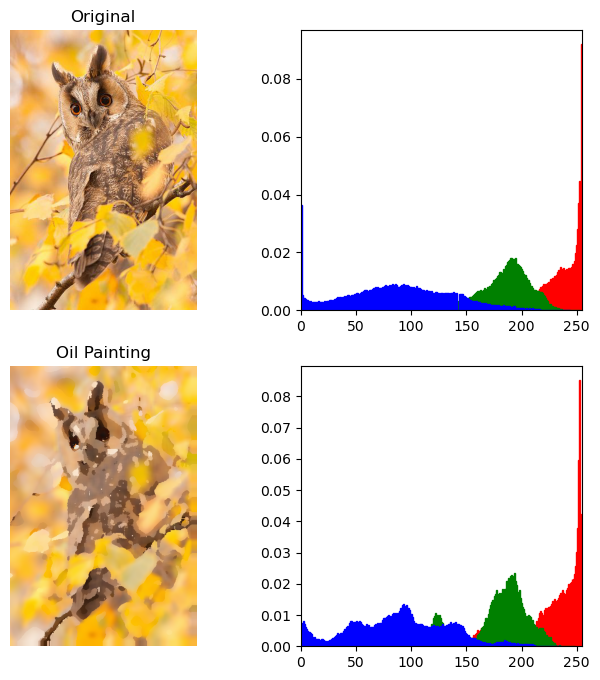

In [5]:
# 根据参考文献自主实现

plt.figure("hist",figsize=(8,8))

img_4_1=io.imread("img_2.jpg")
arr_4_1=img_4_1
arr_4_1.flags["WRITEABLE"]=False
arr_4_2=np.copy(arr_4_1)
arr_4_2.flags["WRITEABLE"]=True
intensity=5 # 区分度，数值越小颜色越少
radius=4 # 窗口半径，数值越大图像越模糊
check_intensity=np.zeros((intensity+1)*4).reshape((intensity+1),4)

for x in range(radius,arr_4_1.shape[0]-radius):
    for y in range(radius,arr_4_1.shape[1]-radius):
        for i in range(-radius,radius+1):
            for j in range(-radius,radius+1):
                # 计算窗口内所有点的强度值
                temp_r=int(arr_4_1[x+i][y+j][0])
                temp_g=int(arr_4_1[x+i][y+j][1])
                temp_b=int(arr_4_1[x+i][y+j][2])
                temp=(((temp_r+temp_g+temp_b)/3)*intensity)/255
                if temp>intensity:
                    temp=intensity
                check_intensity[int(temp)][0]+=1
                check_intensity[int(temp)][1]+=temp_r
                check_intensity[int(temp)][2]+=temp_g
                check_intensity[int(temp)][3]+=temp_b
        # 计算窗口内数量最多的强度值
        max_intensity=0
        for h in range(1,intensity):
            if check_intensity[h][0]-check_intensity[h-1][0]>0:
                max_intensity=h
        # 将最多强度值的R、G、B取平均
        final_r=round(check_intensity[max_intensity][1]/check_intensity[max_intensity][0])
        final_g=round(check_intensity[max_intensity][2]/check_intensity[max_intensity][0])
        final_b=round(check_intensity[max_intensity][3]/check_intensity[max_intensity][0])
        if final_r>255:
            final_r=255
        if final_g>255:
            final_g=255
        if final_b>255:
            final_b=255
        # 将值赋予窗口内所有像素
        for k in range(-radius,radius+1):
            for l in range(-radius,radius+1):
                arr_4_2[x+k][y+l][0]=final_r
                arr_4_2[x+k][y+l][1]=final_g
                arr_4_2[x+k][y+l][2]=final_b
        check_intensity=np.zeros((intensity+1)*4).reshape((intensity+1),4)
        
plt.figure("hist",figsize=(8,8))
plt.subplot(221)
plt.axis('off')
plt.title('Original')
plt.imshow(arr_4_1) # 原始图像
plt.subplot(222)
ar_4_1=arr_4_1[:,:,0].flatten()
plt.hist(ar_4_1, bins=256, density=True, facecolor='r',edgecolor='r')
ag_4_1=arr_4_1[:,:,1].flatten()
plt.hist(ag_4_1, bins=256, density=True, facecolor='g',edgecolor='g')
ab_4_1=arr_4_1[:,:,2].flatten()
plt.hist(ab_4_1, bins=256, density=True, facecolor='b',edgecolor='b') # 原始图像RGB直方图
plt.xlim(0,255)
plt.subplot(223)
plt.axis('off')
plt.title('Oil Painting')
plt.imshow(arr_4_2) # 油画图像
plt.subplot(224)
ar_4_2=arr_4_2[:,:,0].flatten()
plt.hist(ar_4_2, bins=256, density=True, facecolor='r',edgecolor='r')
ag_4_2=arr_4_2[:,:,1].flatten()
plt.hist(ag_4_2, bins=256, density=True, facecolor='g',edgecolor='g')
ab_4_2=arr_4_2[:,:,2].flatten()
plt.hist(ab_4_2, bins=256, density=True, facecolor='b',edgecolor='b') # 油画图像RGB直方图
plt.xlim(0,255)

## 扩展内容：PHOTOSHOP在实现浮雕效果时可以选择方向，常见的算法只能实现8个方向，如何实现任意方向的浮雕效果？

浮雕的原理是通过线性滤波器加强特定的像素的灰度值，以起到灰度变化大的区域更加明显，灰度变化小的区域更加弱化的作用。此前我们使用的算子其实是对角方向的浮雕，参考作业第二部分的图像"Embossment_J",左下角亮，右上角暗；而"Embossment_B"，则是左上角亮，右下角暗，当二者叠加时，由于我选择的图像的特点，暗的部分和亮的部分恰好重合，居然有部分失真。那么，如果我们能选择不同的算子，是否就能模拟不同角度的浮雕呢？


根据参考论文，我将算子改为了：
$$
\begin{bmatrix}
-(sin\alpha+cos\alpha) & -cos\alpha & sin\alpha-cos\alpha \\
-sin\alpha & 0 & sin\alpha \\
-(sin\alpha-cos\alpha) & cos\alpha & sin\alpha+cos\alpha
\end{bmatrix}
$$

在参考论文中，作者称这一矩阵为检测模板，其描述为：根据边缘的方向，设置不同的权重，以得到相应方向边缘相应最大的模板。这就是我们在实现浮雕效果时需要的，有了这一算子，我们就能灵活地设置各边适合的权重，以模拟不同的角度。

Text(0.5, 1.0, 'Embossment Rotate 20')

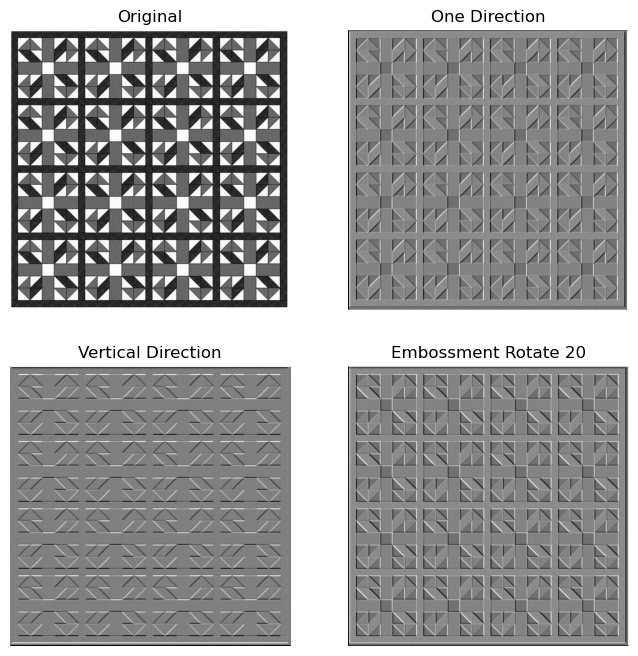

In [6]:
import math

plt.figure("hist",figsize=(8,8))

img_5_1=io.imread("img.jpg",as_gray=True)

arr_5_1=img_5_1

# 其中一个方向
a=20
h=np.array([[-(math.sin(a)+math.cos(a)),-math.cos(a),math.sin(a)-math.cos(a)],
            [-math.sin(a),0,math.sin(a)],
            [-math.sin(a)-math.cos(a),math.cos(a),math.sin(a)+math.cos(a)]])

# 与方向a垂直的方向
b=a+90
v=np.array([[-(math.sin(b)+math.cos(b)),-math.cos(b),math.sin(b)-math.cos(b)],
            [-math.sin(b),0,math.sin(b)],
            [-(math.sin(b)-math.cos(b)),math.cos(b),math.sin(b)+math.cos(b)]])

# 卷积
arr_J=signal.convolve2d(arr_5_1,h)
arr_B=signal.convolve2d(arr_5_1,v)
arr_5_2=arr_J+arr_B

plt.subplot(221)
plt.imshow(arr_5_1,cmap=plt.cm.gray) # 原始图像
plt.axis('off')
plt.title('Original')
plt.subplot(222)
plt.imshow(arr_J,cmap=plt.cm.gray) # 方向a
plt.axis('off')
plt.title('One Direction')
plt.subplot(223)
plt.imshow(arr_B,cmap=plt.cm.gray) # 与方向a垂直的
plt.axis('off')
plt.title('Vertical Direction')
plt.subplot(224)
plt.imshow(arr_5_2,cmap=plt.cm.gray) # 浮雕图像
plt.axis('off')
plt.title('Embossment Rotate '+str(a))

使用其他图像测试：

Text(0.5, 1.0, 'Embossment Rotate 80')

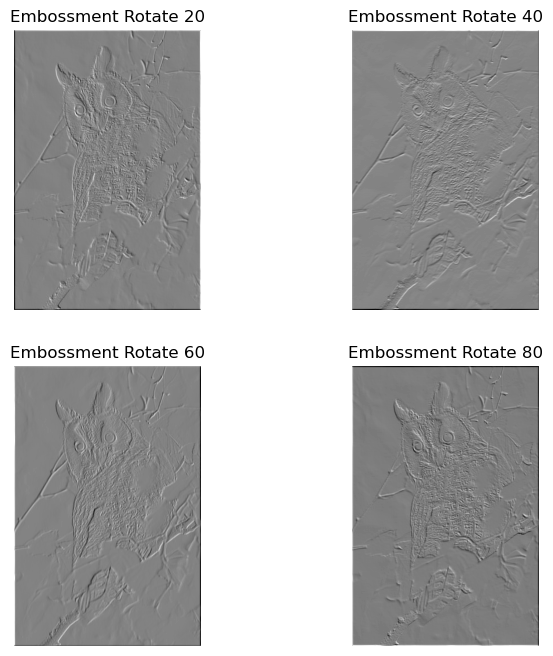

In [7]:
def emboss_rotate(im,a):
    img=io.imread(im,as_gray=True)

    arr=img

    h=np.array([[-(math.sin(a)+math.cos(a)),-math.cos(a),math.sin(a)-math.cos(a)],
                [-math.sin(a),0,math.sin(a)],
                [-(math.sin(a)-math.cos(a)),math.cos(a),math.sin(a)+math.cos(a)]])

    b=a+90
    v=np.array([[-(math.sin(b)+math.cos(b)),-math.cos(b),math.sin(b)-math.cos(b)],
                [-math.sin(b),0,math.sin(b)],
                [-(math.sin(b)-math.cos(b)),math.cos(b),math.sin(b)+math.cos(b)]])

    arr_J=signal.convolve2d(arr,h)
    arr_B=signal.convolve2d(arr,v)
    arr_2=arr_J+arr_B
    return arr_2

plt.figure("hist",figsize=(8,8))
img_test="img_2.jpg"
plt.subplot(221)
plt.imshow(emboss_rotate(img_test,20),cmap=plt.cm.gray)
plt.axis('off')
plt.title('Embossment Rotate 20')
plt.subplot(222)
plt.imshow(emboss_rotate(img_test,40),cmap=plt.cm.gray)
plt.axis('off')
plt.title('Embossment Rotate 40')
plt.subplot(223)
plt.imshow(emboss_rotate(img_test,60),cmap=plt.cm.gray)
plt.axis('off')
plt.title('Embossment Rotate 60')
plt.subplot(224)
plt.imshow(emboss_rotate(img_test,80),cmap=plt.cm.gray)
plt.axis('off')
plt.title('Embossment Rotate 80')